# Week 10

## Today

- Web scraping
- More on Pandas
- Errata

## Anouncements

- Course evaluations open
- extra office hours: most of Wed and Fri
  - https://organisciak.youcanbook.me/
- MCE Awards: Thursday at 4pm
- Classroom photos
- LIS Potluck
  - June 2nd at 5:30 pm, KRH Commons

## Review: Last Week's Lab

## Review: Questions from the Course

# Python - Running Scripts

1. Save a notebook as a script:
    ![](../images/save-as.png)
2. On the command line: `python name_of_script.py`
    - You may need to navigate to the correct folder with `cd /path/to/folder/name`
    - You may need to activate the Anaconda environment, with either `activate` or `source activate`
    
*Notebooks are good for interaction, `.py` script files are good for repetition*

## Web Scraping

Two parts:
    
1. Get the HTML.

2. Parse the HTML and pull out what you need.

1. Get the HTML with the `urllib` library.
2. Parse with the `BeautifulSoup` library.

In [6]:
import urllib
from bs4 import BeautifulSoup

## Getting the data

We won't focus on this too much today, since it's mostly a matter of boilerplate (i.e. consistent, reusable) code.


#1. Create a request.

In [23]:
url = 'http://www.du.edu'
req = urllib.request.Request(url)

#2. Use the request to fetch the page.

In [24]:
page = urllib.request.urlopen(req)

The results can be read to a string with `page.read()`

In [25]:
content = page.read()
print(content)

b'<!DOCTYPE HTML>\n<html class="no-js" lang="en">\n   <head>\n      <meta charset="UTF-8">\n      <meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1, maximum-scale=1">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge">\n      <title>University of Denver</title>\n      <meta property="og:image" content="https://www.du.edu/_duresources/images/avatars/facebook_avatarpreview200x200.jpg">\n      <meta name="twitter:card" content="summary">\n      <meta property="og:site_name" content="University of Denver">\n      <meta name="twitter:image:alt" content="University of Denver shield">\n      <meta name="twitter:site" content="@uofdenver">\n      <meta property="og:title" content="University of Denver">\n      <meta property="og:description" content="">\n      <meta property="og:url" content="https://www.du.edu/">\n<!-- Linked Data - Homepage Only -->\n<script type="application/ld+json">\n\t\t{\n\t\t\t"@context": "http://schema.org",\n\t\t\t"@type":

## On Headers

Why create a 'request'? Sometimes you want to specify information beyond the url, which browsers sends in a 'header'. e.g.

- Define a browser: Some websites don't accept connections if Chrome/Firefox/Safari/Edge aren't identified
- Add password information
- Specify view condition, like fetching a mobile version of a site

Defining a header:

```python
hdr = {'User-Agent': 'Mozilla/5.0'}
req = urllib.request.Request(url, headers=hdr)
```

In [82]:
url = "https://www.congress.gov/search?q=%7B%22source%22%3A%22legislation%22%7D"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = urllib.request.Request(url, headers=hdr)
page = urllib.request.urlopen(req)

[LINK](https://www.congress.gov/search?q=%7B%22source%22%3A%22legislation%22%7D)
![](../images/congress1.png)

## Parsing the Page

In [83]:
soup = BeautifulSoup(page, 'html.parser')

e.g.

In [84]:
soup.find('a')

<a href="https://www.congress.gov"><img alt="Congress.gov" height="28" src="/img/svg/congress-gov-logo.svg" width="302"/></a>

An HTML page parsed with BeautifulSoup treats HTML elements as a complex object, rather than simply a string. Useful methods exist for working with such object, including:

- `el.find(name=tag)` - Find the first matching HTML element of type 'tag'
- `el.find_all(name=tag)` - Returns a list of all matching elements
- `el.children` - Return a list of all elements that are direct children of the current element.
- `el.text` - Extract only the text between tags in the element.
- `el.attrs` - Dictionary (like a JSON object) of element tag elements

In [85]:
first_link = soup.find('a')
first_link.attrs

{'href': 'https://www.congress.gov'}

In [86]:
list(first_link.children)

[<img alt="Congress.gov" height="28" src="/img/svg/congress-gov-logo.svg" width="302"/>]

Use tab autocomplete to see what methods are available!

![](../images/congress1.png)

![](../images/congress2.png)

![](../images/congress3.png)

In [52]:
ordered = soup.find('ol', attrs={'class':'basic-search-results-lists'})
ordered

<ol class="basic-search-results-lists expanded-view" start="1"><li class="expanded"> <div><span class="visualIndicator">BILL</span></div>
    1.
    <span class="result-heading"><a href="https://www.congress.gov/bill/115th-congress/house-bill/5983?r=1">H.R.5983</a> — 115th Congress (2017-2018)</span>
<span class="result-title">To amend the Communications Act of 1934 to require providers of a covered service to provide location information concerning the telecommunications device of a user of such service to an investigative or law enforcement officer or an employee or other agent of a public safety answering point in an emergency situation involving risk of death or serious physical harm or in order to respond to the user's call for emergency services.</span>
<span class="result-item">
<strong>Sponsor:</strong> <a href="/member/kevin-yoder/Y000063" target="_blank">Rep. Yoder, Kevin [R-KS-3]</a> (Introduced 05/25/2018) <strong>Cosponsors:</strong> (<a href="https://www.congress.gov/bill

In [98]:
for child in ordered.children:
    print(child.text)

 BILL
    1.
    H.R.5983 — 115th Congress (2017-2018)
To amend the Communications Act of 1934 to require providers of a covered service to provide location information concerning the telecommunications device of a user of such service to an investigative or law enforcement officer or an employee or other agent of a public safety answering point in an emergency situation involving risk of death or serious physical harm or in order to respond to the user's call for emergency services.

Sponsor: Rep. Yoder, Kevin [R-KS-3] (Introduced 05/25/2018) Cosponsors: (2)        

Committees: House - Energy and Commerce        
 Latest Action:             House - 05/25/2018 Referred to the House Committee on Energy and Commerce. (All Actions)        

            Tracker: This bill has the status IntroducedHere are the steps for Status of Legislation:IntroducedArray
(
    [actionDate] => 2018-05-25
    [displayText] => Introduced in House
    [externalActionCode] => 1000
    [description] => Introd

AttributeError: 'NavigableString' object has no attribute 'text'

What about the error?

### Debugging the error

Looking at the element that causes the error in the loop:

In [99]:
child

'\n'

Problem: not all children are list items (`<li>`)

Possible solutions:
 - Catch the error
 - use `find_all('li')`.
     - Possible problem: if there are more list items deeper in the hierarchy, you may accidentally pull them into the results. We want "`<li>` tags that are direct children of the element set to `ordered`"

**Using `find_all`**

Note that the Passed House, Passed Senate, etc. statuses are treated as their own elements

In [103]:
for child in ordered.find_all('li'):
    print("===================")
    print(child.text)

 BILL
    1.
    H.R.5983 — 115th Congress (2017-2018)
To amend the Communications Act of 1934 to require providers of a covered service to provide location information concerning the telecommunications device of a user of such service to an investigative or law enforcement officer or an employee or other agent of a public safety answering point in an emergency situation involving risk of death or serious physical harm or in order to respond to the user's call for emergency services.

Sponsor: Rep. Yoder, Kevin [R-KS-3] (Introduced 05/25/2018) Cosponsors: (2)        

Committees: House - Energy and Commerce        
 Latest Action:             House - 05/25/2018 Referred to the House Committee on Energy and Commerce. (All Actions)        

            Tracker: This bill has the status IntroducedHere are the steps for Status of Legislation:IntroducedArray
(
    [actionDate] => 2018-05-25
    [displayText] => Introduced in House
    [externalActionCode] => 1000
    [description] => Introd

Passed House
Passed Senate
To President
Became Law
    76.
    H.R.5908 — 115th Congress (2017-2018)
To protect victims of crime or serious labor violations from removal during Department of Homeland Security enforcement actions, and for other purposes.

Sponsor:
Rep. Chu, Judy [D-CA-27] (Introduced 05/22/2018) Cosponsors: (6)


Committees:
House - Judiciary


Latest Action:
House - 05/22/2018 Referred to the House Committee on the Judiciary. (All Actions)


Tracker:
This bill has the status IntroducedHere are the steps for Status of Legislation:IntroducedArray
(
    [actionDate] => 2018-05-22
    [displayText] => Introduced in House
    [externalActionCode] => 1000
    [description] => Introduced
)
Passed HousePassed SenateTo PresidentBecame Law


IntroducedArray
(
    [actionDate] => 2018-05-22
    [displayText] => Introduced in House
    [externalActionCode] => 1000
    [description] => Introduced
)

Passed House
Passed Senate
To President
Became Law
 BILL
    77.
    H.R.5907 — 115

**Using `find_all` with class specified**

In [107]:
for child in ordered.find_all('li', attrs={'class':'expanded'}):
    print("===================")
    print(child.text)

 BILL
    1.
    H.R.5983 — 115th Congress (2017-2018)
To amend the Communications Act of 1934 to require providers of a covered service to provide location information concerning the telecommunications device of a user of such service to an investigative or law enforcement officer or an employee or other agent of a public safety answering point in an emergency situation involving risk of death or serious physical harm or in order to respond to the user's call for emergency services.

Sponsor: Rep. Yoder, Kevin [R-KS-3] (Introduced 05/25/2018) Cosponsors: (2)        

Committees: House - Energy and Commerce        
 Latest Action:             House - 05/25/2018 Referred to the House Committee on Energy and Commerce. (All Actions)        

            Tracker: This bill has the status IntroducedHere are the steps for Status of Legislation:IntroducedArray
(
    [actionDate] => 2018-05-25
    [displayText] => Introduced in House
    [externalActionCode] => 1000
    [description] => Introd

## Extracting pertinent information

Test parsing with the first list item - then you can do the same for all the list items:

In [109]:
# Take the first <li> object
result = ordered.find('li')

In [110]:
result

<li class="expanded"> <div><span class="visualIndicator">BILL</span></div>
    1.
    <span class="result-heading"><a href="https://www.congress.gov/bill/115th-congress/house-bill/5983?r=1">H.R.5983</a> — 115th Congress (2017-2018)</span>
<span class="result-title">To amend the Communications Act of 1934 to require providers of a covered service to provide location information concerning the telecommunications device of a user of such service to an investigative or law enforcement officer or an employee or other agent of a public safety answering point in an emergency situation involving risk of death or serious physical harm or in order to respond to the user's call for emergency services.</span>
<span class="result-item">
<strong>Sponsor:</strong> <a href="/member/kevin-yoder/Y000063" target="_blank">Rep. Yoder, Kevin [R-KS-3]</a> (Introduced 05/25/2018) <strong>Cosponsors:</strong> (<a href="https://www.congress.gov/bill/115th-congress/house-bill/5983/cosponsors?r=1&amp;overview=clo

In [108]:
result.find('span').text

'BILL'

In [71]:
heading = result.find('span', attrs={'class':'result-heading'})
heading

<span class="result-heading"><a href="https://www.congress.gov/bill/115th-congress/house-bill/5983?r=1">H.R.5983</a> — 115th Congress (2017-2018)</span>

In [74]:
heading.find('a').text

'H.R.5983'

In [75]:
heading.find('a').attrs

{'href': 'https://www.congress.gov/bill/115th-congress/house-bill/5983?r=1'}

In [76]:
heading.find('a').attrs['href']

'https://www.congress.gov/bill/115th-congress/house-bill/5983?r=1'

In [67]:
title = result.find('span', attrs={'class':'result-title'})
title.text

"To amend the Communications Act of 1934 to require providers of a covered service to provide location information concerning the telecommunications device of a user of such service to an investigative or law enforcement officer or an employee or other agent of a public safety answering point in an emergency situation involving risk of death or serious physical harm or in order to respond to the user's call for emergency services."

Possible info to extract:

- Name
- URL
- Bill status
- Bill number
- Sponsors
- Date / Congress
- Committees
- House

Putting it together into a DataFrame.

- Loop across elements, saving the extracted info into a lists of values

In [111]:
all_rows = []
for result in ordered.find_all('li', attrs={'class':'expanded'}):
    type_info = result.find('span').text
    heading = result.find('span', attrs={'class':'result-heading'})
    bill_no = heading.find('a').text
    url = heading.find('a').attrs['href']
    title =result.find('span', attrs={'class':'result-title'}).text
    
    row = [type_info, bill_no, url, title]
    all_rows.append(row)

In [114]:
import pandas as pd
pd.DataFrame(all_rows, columns=['type', 'billno', 'url', 'title'])

,type,billno,url,title
0,BILL,H.R.5983,https://www.congress.gov/bill/115th-congress/h...,To amend the Communications Act of 1934 to req...
1,BILL,H.R.5982,https://www.congress.gov/bill/115th-congress/h...,"To amend title 5, United States Code, to incre..."
2,BILL,H.R.5981,https://www.congress.gov/bill/115th-congress/h...,"To amend title 44, United States Code, to proh..."
3,BILL,H.R.5980,https://www.congress.gov/bill/115th-congress/h...,"To authorize, develop, and implement a coordin..."
4,BILL,H.R.5979,https://www.congress.gov/bill/115th-congress/h...,To establish the Mill Springs Battlefield Nati...
5,BILL,H.R.5978,https://www.congress.gov/bill/115th-congress/h...,To amend the Food Security Act of 1985 to prov...
6,BILL,H.R.5977,https://www.congress.gov/bill/115th-congress/h...,To improve Federal efforts with respect to the...
7,BILL,H.R.5976,https://www.congress.gov/bill/115th-congress/h...,To amend the Individuals with Disabilities Edu...
8,BILL,H.R.5975,https://www.congress.gov/bill/115th-congress/h...,"To support businesses in Puerto Rico, extend c..."
9,BILL,H.R.5974,https://www.congress.gov/bill/115th-congress/h...,To direct the Secretary of Veterans Affairs to...


## Exercises

- Scrape the calendar from https://morgridge.du.edu
  - How would you gather the information from the details page?

## Pandas

In [139]:
df = pd.read_csv('../data/weather-example.csv')
df.head(10)

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
0,USC00052228,"DENVER MUSEUM, CO US",5/22/2017,0.08,0.0,0.0,67,42,42
1,USC00052228,"DENVER MUSEUM, CO US",5/23/2017,0.00,0.0,0.0,63,39,48
2,USC00052228,"DENVER MUSEUM, CO US",5/24/2017,0.00,0.0,0.0,83,40,62
3,USC00052228,"DENVER MUSEUM, CO US",5/25/2017,0.03,0.0,0.0,76,51,52
4,USC00052228,"DENVER MUSEUM, CO US",5/26/2017,0.37,0.0,0.0,71,42,51
5,USC00052228,"DENVER MUSEUM, CO US",5/27/2017,0.17,0.0,0.0,59,46,47
6,USC00052228,"DENVER MUSEUM, CO US",5/28/2017,0.00,0.0,0.0,72,43,53
7,USC00052228,"DENVER MUSEUM, CO US",5/29/2017,0.00,0.0,0.0,69,47,53
8,USC00052228,"DENVER MUSEUM, CO US",5/30/2017,0.03,0.0,0.0,76,47,56
9,USC00052228,"DENVER MUSEUM, CO US",5/31/2017,0.00,0.0,0.0,82,48,61


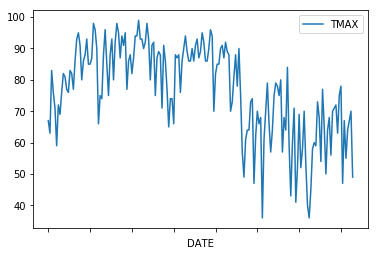

In [140]:
%matplotlib inline
df.plot(x='DATE', y='TMAX')

## Rolling means

Column:

```
df.columnName.rolling(window, min_periods=None, on=None, axis=0, closed=None)
```

In [141]:
df.TMAX.rolling(window=7).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6      70.142857
7      70.428571
8      72.285714
9      72.142857
10     72.857143
11     73.714286
12     76.142857
13     77.714286
14     79.571429
15     79.714286
16     80.285714
17     82.000000
18     84.571429
19     86.714286
20     86.285714
21     86.857143
22     88.428571
23     89.428571
24     88.285714
25     86.857143
26     86.285714
27     88.857143
28     90.285714
29     90.571429
         ...    
153    59.000000
154    56.428571
155    56.285714
156    54.000000
157    50.571429
158    51.428571
159    51.714286
160    50.142857
161    53.000000
162    57.000000
163    59.571429
164    64.142857
165    65.142857
166    63.714286
167    64.428571
168    63.714286
169    62.000000
170    64.285714
171    63.428571
172    64.428571
173    66.285714
174    67.857143
175    69.285714
176    68.000000
177    67.571429
178    65.285714
179    64.142857
180    64.7142

Easier to compare as a new column of the DataFrame:

In [142]:
df['rolling_max'] = df.TMAX.rolling(window=7).mean()
df.head(10)

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,rolling_max
0,USC00052228,"DENVER MUSEUM, CO US",5/22/2017,0.08,0.0,0.0,67,42,42,NaN
1,USC00052228,"DENVER MUSEUM, CO US",5/23/2017,0.00,0.0,0.0,63,39,48,NaN
2,USC00052228,"DENVER MUSEUM, CO US",5/24/2017,0.00,0.0,0.0,83,40,62,NaN
3,USC00052228,"DENVER MUSEUM, CO US",5/25/2017,0.03,0.0,0.0,76,51,52,NaN
4,USC00052228,"DENVER MUSEUM, CO US",5/26/2017,0.37,0.0,0.0,71,42,51,NaN
5,USC00052228,"DENVER MUSEUM, CO US",5/27/2017,0.17,0.0,0.0,59,46,47,NaN
6,USC00052228,"DENVER MUSEUM, CO US",5/28/2017,0.00,0.0,0.0,72,43,53,70.142857
7,USC00052228,"DENVER MUSEUM, CO US",5/29/2017,0.00,0.0,0.0,69,47,53,70.428571
8,USC00052228,"DENVER MUSEUM, CO US",5/30/2017,0.03,0.0,0.0,76,47,56,72.285714
9,USC00052228,"DENVER MUSEUM, CO US",5/31/2017,0.00,0.0,0.0,82,48,61,72.142857


In [150]:
df['rolling_max'] = df.TMAX.rolling(window=7, min_periods=1).mean()
df.head(15)

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,rolling_max
0,USC00052228,"DENVER MUSEUM, CO US",5/22/2017,0.08,0.0,0.0,67,42,42,67.000000
1,USC00052228,"DENVER MUSEUM, CO US",5/23/2017,0.00,0.0,0.0,63,39,48,65.000000
2,USC00052228,"DENVER MUSEUM, CO US",5/24/2017,0.00,0.0,0.0,83,40,62,71.000000
3,USC00052228,"DENVER MUSEUM, CO US",5/25/2017,0.03,0.0,0.0,76,51,52,72.250000
4,USC00052228,"DENVER MUSEUM, CO US",5/26/2017,0.37,0.0,0.0,71,42,51,72.000000
5,USC00052228,"DENVER MUSEUM, CO US",5/27/2017,0.17,0.0,0.0,59,46,47,69.833333
6,USC00052228,"DENVER MUSEUM, CO US",5/28/2017,0.00,0.0,0.0,72,43,53,70.142857
7,USC00052228,"DENVER MUSEUM, CO US",5/29/2017,0.00,0.0,0.0,69,47,53,70.428571
8,USC00052228,"DENVER MUSEUM, CO US",5/30/2017,0.03,0.0,0.0,76,47,56,72.285714
9,USC00052228,"DENVER MUSEUM, CO US",5/31/2017,0.00,0.0,0.0,82,48,61,72.142857


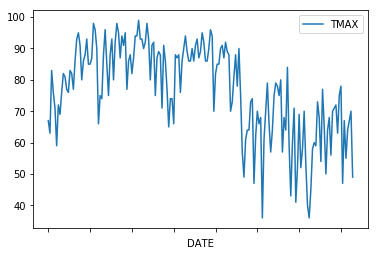

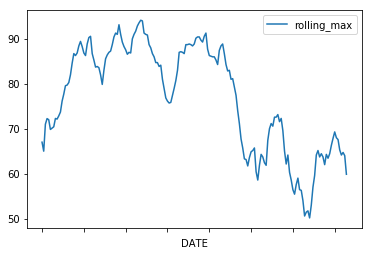

In [151]:
df.plot(x='DATE', y='TMAX')
df.plot(x='DATE', y='rolling_max')

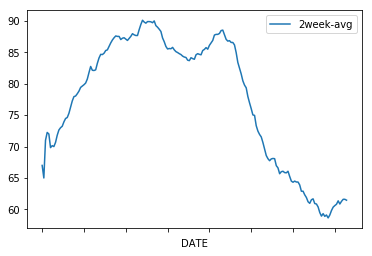

In [152]:
df['2week-avgmax'] = df.TMAX.rolling(window=7*4, min_periods=1).mean()
df.plot(x='DATE', y='2week-avgmax')

## Data types

Pandas tries to figure out the datatype automatically: integer, float, string, object (i.e. mix of various), boolean.

In [155]:
df.dtypes

STATION         object
NAME            object
DATE            object
PRCP           float64
SNOW           float64
SNWD           float64
TMAX             int64
TMIN             int64
TOBS             int64
rolling_max    float64
2week-avg      float64
dtype: object

## Working with dates and time

The 'Date' column is not recognized as dates. Convert it with `pd.to_datetime(column)` -- Then Pandas can work more smartly.

Here's some fake data, with 5 data points from May and 5 from July:

         DATE  TMAX
3   5/25/2017    76
4   5/26/2017    71
40   7/4/2017    92
41   7/5/2017    98


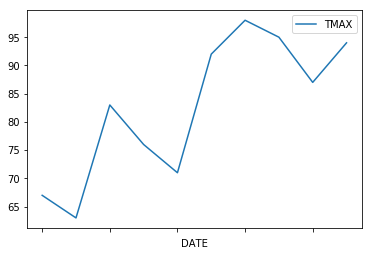

In [169]:
fake_data = pd.concat([df[0:5], df[40:45]])
print(fake_data[['DATE', 'TMAX']][3:7])
fake_data.plot(x='DATE', y='TMAX')

#### Problem: *Since Pandas doesn't realize that 'DATE' is a date column, it doesn't show the proper spacing between 5/26 and 7/4*

### `pd.to_datetime()`

The following will convert the generic 'object' datatype of the DATE column into a 'datetime' datatype:

In [172]:
pd.to_datetime(df.DATE).head()

0   2017-05-22
1   2017-05-23
2   2017-05-24
3   2017-05-25
4   2017-05-26
Name: DATE, dtype: datetime64[ns]

Set it to a new column, or overwrite the existing column. Here, I'm setting to 'new_date' for clarity.

In [175]:
df['new_date'] = pd.to_datetime(df.DATE)
df.head(2)

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,rolling_max,2week-avg,new_date
0,USC00052228,"DENVER MUSEUM, CO US",5/22/2017,0.08,0.0,0.0,67,42,42,67.0,67.0,2017-05-22
1,USC00052228,"DENVER MUSEUM, CO US",5/23/2017,0.00,0.0,0.0,63,39,48,65.0,65.0,2017-05-23


In [176]:
df.dtypes

STATION                object
NAME                   object
DATE                   object
PRCP                  float64
SNOW                  float64
SNWD                  float64
TMAX                    int64
TMIN                    int64
TOBS                    int64
rolling_max           float64
2week-avg             float64
new_date       datetime64[ns]
dtype: object

         DATE   new_date  TMAX
3   5/25/2017 2017-05-25    76
4   5/26/2017 2017-05-26    71
40   7/4/2017 2017-07-04    92
41   7/5/2017 2017-07-05    98


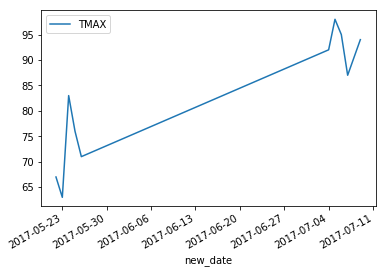

In [182]:
fake_data = pd.concat([df[0:5], df[40:45]])
print(fake_data[['DATE', 'new_date', 'TMAX']][3:7])
fake_data.plot(x='new_date', y='TMAX')

## Better!

With a proper data column:
    
- `rolling` will be more accurate, especially with less neat intervals than our weather data
  - e.g. `df.col1.rolling('2w')`, `df.col1.rolling('20m')`
- Can select substrings by date
  - e.g. return June 2017 - Sept 2017
- Proper intervals in plots
- Easy conversion of timezones
- Easy convert from datetime field to custom strings; by month, or year, or minute, etc.

Documentation: [Time Series / Date functionality](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

## Pandas <-> SQL Skills Transfer

[Pandas Documentation: Comparison with SQL](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html)

![](../images/sql-skills.png)

# Thank you